**Business Case & Value: Trying to solve a classificatin problem of dividing house categories in affordable, cheap or expensive by keeping in mind the percentage of people that falls under category of rich, medium class or below poverty line.**

Importing Libraries

In [354]:
import numpy as np
import pandas as pd
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
import pickle

Data Loading

In [355]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [356]:
data1 = pd.read_csv("/content/drive/MyDrive/Team Dragonites/Midterm Dataset/Vishnu/Dataset_Realestate.csv",)
data1

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,...,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,205,70983496,"109 Sunrise Fls, Cibolo, TX 78108",29.599431,-98.254866,296000.0,USD,3.0,3.0,2294.0 sqft,...,2024.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/41ca4905859...,House for sale,Opendoor Brokerage LLC,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/109-Sunrise...,https://www.zillow.com/homes/TX_rb/6_p/
1,711,30429260,"299 Mount Whitney Way, Lake Placid, NY 12946",44.306944,-73.950285,1995000.0,USD,5.0,4.0,3000.0 sqft,...,NaN,0.0,NaN,False,https://photos.zillowstatic.com/fp/3071787e4e5...,House for sale,"Listing by: Merrill L. Thomas, Inc.",https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/299-Mount-W...,https://www.zillow.com/homes/NY_rb/18_p/
2,66,97629907,"2910 Persimmon Grv, Richmond, TX 77469",29.557442,-95.751786,425000.0,USD,3.0,2.0,2575.0 sqft,...,2967.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/f4716b346d1...,House for sale,CENTURY 21 Western Realty,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/2910-Persim...,https://www.zillow.com/homes/TX_rb/2_p/
3,222,240296342,"19251 E State Route 106, Belfair, WA 98528",47.427678,-122.855113,895000.0,USD,2.0,2.0,1248.0 sqft,...,1969.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/690e2ee9c08...,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/19251-E-Sta...,https://www.zillow.com/homes/WA_rb/6_p/
4,444,2076995275,"Clover Plan, The Alpine Collection at Altaira ...",39.813670,-104.765885,391500.0,USD,3.0,4.0,1752.0 sqft,...,1756.0,9.0,NaN,False,https://photos.zillowstatic.com/fp/9b2ae0d3768...,New construction,NaN,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/community/alpine-collec...,"https://www.zillow.com/homes/denver,-co_rb/12_p/"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,666,48804042,"2218 Bremerton Ave NE, Renton, WA 98059",47.511643,-122.158842,680000.0,USD,3.0,3.0,1770.0 sqft,...,2926.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/6257ffb2491...,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/2218-Bremer...,https://www.zillow.com/homes/WA_rb/17_p/
5886,594,2068426967,"Taylor Plan, The Hub at Virginia Village",39.680219,-104.922037,644990.0,USD,4.0,4.0,2157.0 sqft,...,NaN,17.0,NaN,False,https://photos.zillowstatic.com/fp/a1758482c49...,New construction,NaN,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/community/hub-at-virgin...,"https://www.zillow.com/homes/denver,-co_rb/15_p/"
5887,637,26185150,"126 Kingsman St, Converse, TX 78109",29.503986,-98.305032,210000.0,USD,2.0,4.0,1576.0 sqft,...,1680.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/192eb9595d3...,House for sale,Watters International Realty,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/126-Kingsma...,https://www.zillow.com/homes/TX_rb/16_p/
5888,146,61322711,"2043 Sonador Cmns, San Jose, CA 95128",37.301273,-121.929018,850000.0,USD,3.0,2.0,1860.0 sqft,...,3668.0,3.0,NaN,False,https://photos.zillowstatic.com/fp/9788bda0cd2...,Condo for sale,NaN,"https://www.zillow.com/homes/san-jose,-CA_rb/",https://www.zillow.com/homedetails/2043-Sonado...,"https://www.zillow.com/homes/san-jose,-CA_rb/4_p/"


In [357]:
y = data1['listing_type']
c = Counter(y)
c

Counter({'Active': 738,
         'Apartment for sale': 3,
         'Auction': 14,
         'Coming soon': 98,
         'Condo for sale': 790,
         'Foreclosure': 17,
         'Home for sale': 162,
         'House for sale': 2772,
         'Lot / Land for sale': 381,
         'Multi-family home for sale': 236,
         'New': 1,
         'New construction': 388,
         'Townhouse for sale': 290})

In [358]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             5890 non-null   int64  
 1   property_id      5890 non-null   int64  
 2   address          5890 non-null   object 
 3   latitude         5774 non-null   float64
 4   longitude        5774 non-null   float64
 5   price            5873 non-null   float64
 6   currency         5890 non-null   object 
 7   bathrooms        5342 non-null   float64
 8   bedrooms         5426 non-null   float64
 9   area             5290 non-null   object 
 10  land_area        443 non-null    object 
 11  zestimate        3968 non-null   float64
 12  rent_zestimate   4535 non-null   float64
 13  days_on_zillow   5886 non-null   float64
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  5890 non-null   bool   
 16  image            5890 non-null   object 
 17  listing_type  

Cleaning

In [359]:
data1.isna().sum()

rank                  0
property_id           0
address               0
latitude            116
longitude           116
price                17
currency              0
bathrooms           548
bedrooms            464
area                600
land_area          5447
zestimate          1922
rent_zestimate     1355
days_on_zillow        4
sold_date          5890
is_zillow_owned       0
image                 0
listing_type          0
broker_name        2515
input                 0
property_url          0
listing_url           0
dtype: int64

In [360]:
data1.drop_duplicates(inplace=True)
data1.shape

(5890, 22)

In [361]:
data1.drop(['sold_date','currency','land_area'],axis=1,inplace=True)
data1.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,205,70983496,"109 Sunrise Fls, Cibolo, TX 78108",29.599431,-98.254866,296000.0,3.0,3.0,2294.0 sqft,270100.0,2024.0,0.0,False,https://photos.zillowstatic.com/fp/41ca4905859...,House for sale,Opendoor Brokerage LLC,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/109-Sunrise...,https://www.zillow.com/homes/TX_rb/6_p/
1,711,30429260,"299 Mount Whitney Way, Lake Placid, NY 12946",44.306944,-73.950285,1995000.0,5.0,4.0,3000.0 sqft,NaN,NaN,0.0,False,https://photos.zillowstatic.com/fp/3071787e4e5...,House for sale,"Listing by: Merrill L. Thomas, Inc.",https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/299-Mount-W...,https://www.zillow.com/homes/NY_rb/18_p/
2,66,97629907,"2910 Persimmon Grv, Richmond, TX 77469",29.557442,-95.751786,425000.0,3.0,2.0,2575.0 sqft,436000.0,2967.0,0.0,False,https://photos.zillowstatic.com/fp/f4716b346d1...,House for sale,CENTURY 21 Western Realty,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/2910-Persim...,https://www.zillow.com/homes/TX_rb/2_p/
3,222,240296342,"19251 E State Route 106, Belfair, WA 98528",47.427678,-122.855113,895000.0,2.0,2.0,1248.0 sqft,NaN,1969.0,0.0,False,https://photos.zillowstatic.com/fp/690e2ee9c08...,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/19251-E-Sta...,https://www.zillow.com/homes/WA_rb/6_p/
4,444,2076995275,"Clover Plan, The Alpine Collection at Altaira ...",39.813670,-104.765885,391500.0,3.0,4.0,1752.0 sqft,NaN,1756.0,9.0,False,https://photos.zillowstatic.com/fp/9b2ae0d3768...,New construction,NaN,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/community/alpine-collec...,"https://www.zillow.com/homes/denver,-co_rb/12_p/"


In [362]:
data1.sort_values('rank',inplace=True)
data1.head(10)

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
1240,1,52510105,"323 Cantle Ln, Encinitas, CA 92024",33.075887,-117.207975,3850000.0,5.0,5.0,4985.0 sqft,2954900.0,9659.0,-10.0,False,https://photos.zillowstatic.com/fp/634dbbe593b...,Coming soon,Compass,"https://www.zillow.com/homes/Encinitas,-CA_rb/",https://www.zillow.com/homedetails/323-Cantle-...,"https://www.zillow.com/homes/Encinitas,-CA_rb/"
1226,1,231188314,"1215 Drake Ave, Centerville, IA 52544",40.722992,-92.872334,78000.0,1.0,2.0,980.0 sqft,NaN,669.0,0.0,False,https://photos.zillowstatic.com/fp/a875d55eb0f...,House for sale,Real McCoy Realty LLC,https://www.zillow.com/homes/IA_rb/,https://www.zillow.com/homedetails/1215-Drake-...,https://www.zillow.com/homes/IA_rb/
3638,1,19685304,"2116 Cottle Ave, San Jose, CA 95125",37.289548,-121.894708,1875000.0,2.0,4.0,1742.0 sqft,1600900.0,4227.0,0.0,False,https://photos.zillowstatic.com/fp/7ff88e5bc2e...,House for sale,NaN,"https://www.zillow.com/homes/san-jose,-CA_rb/",https://www.zillow.com/homedetails/2116-Cottle...,"https://www.zillow.com/homes/san-jose,-CA_rb/"
3659,1,95063927,"2406 Trona Way, Carlsbad, CA 92009",33.117731,-117.267757,1275000.0,4.0,3.0,2105.0 sqft,NaN,NaN,-5.0,False,https://photos.zillowstatic.com/fp/9d29150283e...,Coming soon,"Gillespie Realty, Inc.","https://www.zillow.com/homes/carlsbad,-CA_rb/",https://www.zillow.com/homedetails/2406-Trona-...,"https://www.zillow.com/homes/carlsbad,-CA_rb/"
5546,1,2108109123,"16 Rivers Edge Dr #307, Tarrytown, NY 10591",41.080700,-73.867500,1599000.0,3.0,3.0,2310.0 sqft,1196700.0,4352.0,0.0,False,https://maps.googleapis.com/maps/api/staticmap...,Condo for sale,Listing by: Catherine R Madaio Lic Re Bkr Ny,https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/16-Rivers-E...,https://www.zillow.com/homes/NY_rb/
3853,1,2067969254,"1117 Kelowna Rd #76, San Diego, CA 92126",32.925575,-117.141676,450000.0,1.0,2.0,698.0 sqft,NaN,NaN,-17.0,False,https://photos.zillowstatic.com/fp/8b87b88b00f...,Coming soon,Finest City Home & Loans,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/1117-Kelown...,"https://www.zillow.com/homes/San-Diego,-CA_rb/"
1555,1,13337462,"643 Meade St, Denver, CO 80204",39.727320,-105.036509,385000.0,1.0,2.0,760.0 sqft,390600.0,1959.0,0.0,False,https://photos.zillowstatic.com/fp/8b5710d59dc...,House for sale,Buildings & Residences - Denver,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/homedetails/643-Meade-S...,"https://www.zillow.com/homes/denver,-co_rb/"
2419,1,16641029,"28475 Cerveza Ct, Escondido, CA 92026",33.225633,-117.102906,1195000.0,3.0,3.0,2984.0 sqft,1049900.0,4440.0,-6.0,False,https://photos.zillowstatic.com/fp/be765653b6f...,Coming soon,"Judson Real Estate, Ramona","https://www.zillow.com/homes/Escondido,-CA_rb/",https://www.zillow.com/homedetails/28475-Cerve...,"https://www.zillow.com/homes/Escondido,-CA_rb/"
1698,1,49279422,"1101 15th Ave, Milton, WA 98354",47.249503,-122.315114,614000.0,4.0,4.0,2726.0 sqft,564300.0,2706.0,0.0,False,https://photos.zillowstatic.com/fp/13c2393075f...,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/1101-15th-A...,https://www.zillow.com/homes/WA_rb/
1227,1,16761940,"3000 Sandy Ln, Del Mar, CA 92014",32.974024,-117.270077,23000000.0,5.0,5.0,2729.0 sqft,22336400.0,34586.0,8.0,False,https://photos.zillowstatic.com/fp/47c824b3191...,House for sale,Willis Allen Real Estate,"https://www.zillow.com/homes/Del-Mar,-CA_rb/",https://www.zillow.com/homedetails/3000-Sandy-...,"https://www.zillow.com/homes/Del-Mar,-CA_rb/"


In [363]:
data1.drop(data1[data1['days_on_zillow'] < 0.0].index, inplace = True)
data1.drop(data1[data1['bedrooms'] == 0].index,inplace = True)
data1.shape

(5760, 19)

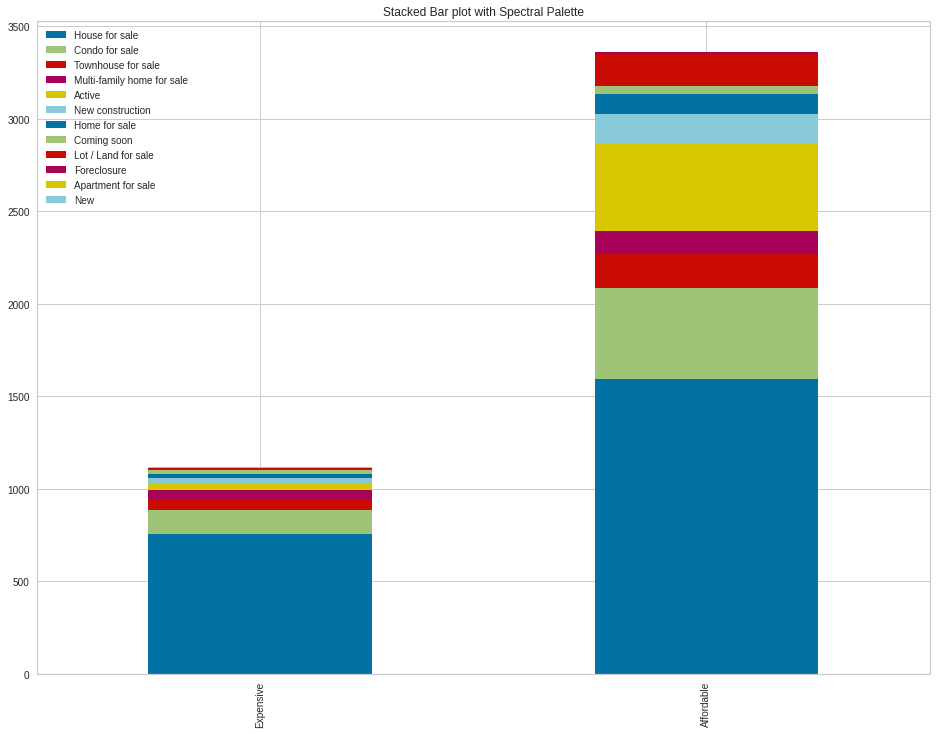

In [364]:
a = data1.loc[data1['rent_zestimate'] > 3500, :]['listing_type'].value_counts()
b = data1.loc[data1['rent_zestimate'] <= 3500, :]['listing_type'].value_counts()
df_plot = pd.DataFrame([a,b])
df_plot.index=['Expensive','Affordable']
df_plot.plot(figsize = (16,12),kind='bar',stacked=True, title='Stacked Bar plot with Spectral Palette');
plt.show()

In [365]:
data1.drop(data1.loc[:, 'rank':'address'].columns, axis = 1,inplace=True)
data1.shape

(5760, 16)

In [366]:
data1.drop(data1.loc[:, 'zestimate':'listing_url'].columns, axis = 1,inplace=True)
data1

,latitude,longitude,price,bathrooms,bedrooms,area
1226,40.722992,-92.872334,78000.0,1.0,2.0,980.0 sqft
3638,37.289548,-121.894708,1875000.0,2.0,4.0,1742.0 sqft
5546,41.080700,-73.867500,1599000.0,3.0,3.0,2310.0 sqft
1555,39.727320,-105.036509,385000.0,1.0,2.0,760.0 sqft
1698,47.249503,-122.315114,614000.0,4.0,4.0,2726.0 sqft
...,...,...,...,...,...,...
3309,30.513644,-97.721867,469500.0,2.0,4.0,1902.0 sqft
3341,41.761573,-91.573367,310000.0,3.0,3.0,1996.0 sqft
291,42.914873,-73.822692,350000.0,2.0,3.0,1468.0 sqft
1237,32.807983,-117.256705,2450000.0,2.0,2.0,NaN


In [367]:
data1 = data1[data1['area'].notna()]
data1

,latitude,longitude,price,bathrooms,bedrooms,area
1226,40.722992,-92.872334,78000.0,1.0,2.0,980.0 sqft
3638,37.289548,-121.894708,1875000.0,2.0,4.0,1742.0 sqft
5546,41.080700,-73.867500,1599000.0,3.0,3.0,2310.0 sqft
1555,39.727320,-105.036509,385000.0,1.0,2.0,760.0 sqft
1698,47.249503,-122.315114,614000.0,4.0,4.0,2726.0 sqft
...,...,...,...,...,...,...
4328,45.692851,-122.532377,450000.0,2.0,4.0,2039.0 sqft
3309,30.513644,-97.721867,469500.0,2.0,4.0,1902.0 sqft
3341,41.761573,-91.573367,310000.0,3.0,3.0,1996.0 sqft
291,42.914873,-73.822692,350000.0,2.0,3.0,1468.0 sqft


In [368]:
data1[['area','Last']] = data1.area.str.split(" ",expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [369]:
data1.drop(['Last'],axis=1,inplace=True)
data1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,latitude,longitude,price,bathrooms,bedrooms,area
1226,40.722992,-92.872334,78000.0,1.0,2.0,980.0
3638,37.289548,-121.894708,1875000.0,2.0,4.0,1742.0
5546,41.080700,-73.867500,1599000.0,3.0,3.0,2310.0
1555,39.727320,-105.036509,385000.0,1.0,2.0,760.0
1698,47.249503,-122.315114,614000.0,4.0,4.0,2726.0
...,...,...,...,...,...,...
4328,45.692851,-122.532377,450000.0,2.0,4.0,2039.0
3309,30.513644,-97.721867,469500.0,2.0,4.0,1902.0
3341,41.761573,-91.573367,310000.0,3.0,3.0,1996.0
291,42.914873,-73.822692,350000.0,2.0,3.0,1468.0


Scraped data from zillow from CHICAGO

In [370]:
data2 = pd.read_csv("/content/drive/MyDrive/Team Dragonites/Midterm Dataset/Vishnu/chicago.csv")
data2

,address/city,address/community,address/neighborhood,address/state,address/streetAddress,address/subdivision,address/zipcode,bathrooms,bedrooms,currency,...,photos/83,photos/84,photos/85,photos/86,photos/87,photos/88,photos/89,price,url,yearBuilt
0,Chicago,NaN,NaN,IL,445 W Fullerton Pkwy #L1A,NaN,60614,2.0,3.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259999,https://www.zillow.com/homedetails/445-W-Fulle...,NaN
1,Chicago,NaN,NaN,IL,535 N Michigan Ave APT 2912,NaN,60611,1.0,1.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000,https://www.zillow.com/homedetails/535-N-Michi...,1959.0
2,Chicago,NaN,NaN,IL,5143 N Nordica Ave,NaN,60656,2.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225000,https://www.zillow.com/homedetails/5143-N-Nord...,1947.0
3,Chicago,NaN,NaN,IL,5025 W Berwyn Ave,NaN,60630,2.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349000,https://www.zillow.com/homedetails/5025-W-Berw...,1887.0
4,Chicago,NaN,NaN,IL,139 N Menard Ave,NaN,60644,4.0,7.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499900,https://www.zillow.com/homedetails/139-N-Menar...,1893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Chicago,NaN,NaN,IL,6417 N Greenview Ave APT 3E,NaN,60626,1.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169000,https://www.zillow.com/homedetails/6417-N-Gree...,1916.0
1022,Chicago,NaN,NaN,IL,3841 W 76th St,NaN,60652,1.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180000,https://www.zillow.com/homedetails/3841-W-76th...,1961.0
1023,Chicago,NaN,NaN,IL,1701 W Webster Ave #510,Triangle Square Condos,60614,2.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622000,https://www.zillow.com/homedetails/1701-W-Webs...,2021.0
1024,Chicago,NaN,NaN,IL,2524 W Polk St,The 12 Chicago,60612,4.0,4.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590000,https://www.zillow.com/homedetails/2524-W-Polk...,2021.0


In [371]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Columns: 108 entries, address/city to yearBuilt
dtypes: float64(7), int64(2), object(99)
memory usage: 865.8+ KB


In [372]:
data2 = data2[['latitude','longitude','price','bathrooms','bedrooms','livingArea']]
data2

,latitude,longitude,price,bathrooms,bedrooms,livingArea
0,41.925304,-87.640854,259999,2.0,3.0,1200.0
1,41.891865,-87.623900,200000,1.0,1.0,752.0
2,41.974995,-87.802070,225000,2.0,2.0,1421.0
3,41.977580,-87.752910,349000,2.0,2.0,1616.0
4,41.883297,-87.769420,499900,4.0,7.0,3600.0
...,...,...,...,...,...,...
1021,41.998745,-87.667595,169000,1.0,2.0,0.0
1022,41.754757,-87.720020,180000,1.0,2.0,918.0
1023,41.921333,-87.670630,622000,2.0,2.0,1462.0
1024,41.871346,-87.689820,590000,4.0,4.0,2800.0


In [373]:
data2 = data2[data2['livingArea'].notna()]
data2

,latitude,longitude,price,bathrooms,bedrooms,livingArea
0,41.925304,-87.640854,259999,2.0,3.0,1200.0
1,41.891865,-87.623900,200000,1.0,1.0,752.0
2,41.974995,-87.802070,225000,2.0,2.0,1421.0
3,41.977580,-87.752910,349000,2.0,2.0,1616.0
4,41.883297,-87.769420,499900,4.0,7.0,3600.0
...,...,...,...,...,...,...
1021,41.998745,-87.667595,169000,1.0,2.0,0.0
1022,41.754757,-87.720020,180000,1.0,2.0,918.0
1023,41.921333,-87.670630,622000,2.0,2.0,1462.0
1024,41.871346,-87.689820,590000,4.0,4.0,2800.0


In [374]:
data2 = data2.rename(columns={"livingArea":"area"})
data2.head()

,latitude,longitude,price,bathrooms,bedrooms,area
0,41.925304,-87.640854,259999,2.0,3.0,1200.0
1,41.891865,-87.623900,200000,1.0,1.0,752.0
2,41.974995,-87.802070,225000,2.0,2.0,1421.0
3,41.977580,-87.752910,349000,2.0,2.0,1616.0
4,41.883297,-87.769420,499900,4.0,7.0,3600.0


Scraped data from zillow from SAN-FRANCISCO

In [375]:
data3 = pd.read_csv("/content/drive/MyDrive/Team Dragonites/Midterm Dataset/Vishnu/san-francisco.csv")
data3

,address/city,address/community,address/neighborhood,address/state,address/streetAddress,address/subdivision,address/zipcode,bathrooms,bedrooms,currency,...,photos/98,photos/99,photos/100,photos/101,photos/102,photos/103,photos/104,price,url,yearBuilt
0,San Francisco,NaN,NaN,CA,1400 Mission St APT 1011,NaN,94103,2.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389778,https://www.zillow.com/homedetails/1400-Missio...,2015.0
1,San Francisco,NaN,NaN,CA,1220 La Playa St APT 308,NaN,94122,1.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213389,https://www.zillow.com/homedetails/1220-La-Pla...,1961.0
2,San Francisco,NaN,NaN,CA,52 Innes Ct APT 204,NaN,94124,2.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297737,https://www.zillow.com/homedetails/52-Innes-Ct...,2017.0
3,San Francisco,NaN,NaN,CA,299 Tara St,NaN,94112,2.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949000,https://www.zillow.com/homedetails/299-Tara-St...,0.0
4,San Francisco,NaN,NaN,CA,2860 Sacramento St,NaN,94115,2.0,3.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949000,https://www.zillow.com/homedetails/2860-Sacram...,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,San Francisco,NaN,NaN,CA,10 Innes Ct #104,The San Francisco Shipyard : Landing,94124,2.0,2.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795000,https://www.zillow.com/homedetails/10-Innes-Ct...,2022.0
744,San Francisco,NaN,NaN,CA,10 Innes Ct #401,The San Francisco Shipyard : Landing,94124,2.0,3.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999000,https://www.zillow.com/homedetails/10-Innes-Ct...,2022.0
745,San Francisco,NaN,NaN,CA,10 Kennedy Pl #211,The San Francisco Shipyard : Landing,94124,1.0,1.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,649000,https://www.zillow.com/homedetails/10-Kennedy-...,2022.0
746,San Francisco,NaN,NaN,CA,10 Innes Ct #303,The San Francisco Shipyard : Landing,94124,2.0,3.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,899000,https://www.zillow.com/homedetails/10-Innes-Ct...,2022.0


In [376]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Columns: 123 entries, address/city to yearBuilt
dtypes: float64(7), int64(2), object(114)
memory usage: 718.9+ KB


In [377]:
data3 = data3[['latitude','longitude','price','bathrooms','bedrooms','livingArea']]
data3

,latitude,longitude,price,bathrooms,bedrooms,livingArea
0,37.775284,-122.416490,389778,2.0,2.0,974.0
1,37.763504,-122.509030,213389,1.0,2.0,854.0
2,37.727570,-122.367256,297737,2.0,2.0,1190.0
3,37.719036,-122.449640,949000,2.0,2.0,0.0
4,37.789352,-122.439964,1949000,2.0,3.0,1894.0
...,...,...,...,...,...,...
743,37.727920,-122.367910,795000,2.0,2.0,1044.0
744,37.727920,-122.367910,999000,2.0,3.0,1256.0
745,37.728172,-122.367660,649000,1.0,1.0,657.0
746,37.727920,-122.367910,899000,2.0,3.0,1223.0


In [378]:
data3 = data3[data3['livingArea'].notna()]
data3 = data3.rename(columns={"livingArea":"area"})
data3

,latitude,longitude,price,bathrooms,bedrooms,area
0,37.775284,-122.416490,389778,2.0,2.0,974.0
1,37.763504,-122.509030,213389,1.0,2.0,854.0
2,37.727570,-122.367256,297737,2.0,2.0,1190.0
3,37.719036,-122.449640,949000,2.0,2.0,0.0
4,37.789352,-122.439964,1949000,2.0,3.0,1894.0
...,...,...,...,...,...,...
743,37.727920,-122.367910,795000,2.0,2.0,1044.0
744,37.727920,-122.367910,999000,2.0,3.0,1256.0
745,37.728172,-122.367660,649000,1.0,1.0,657.0
746,37.727920,-122.367910,899000,2.0,3.0,1223.0


Amalgamation of all 3 datasets

In [379]:
frame = [data1,data2,data3]
data = pd.concat(frame)
data

,latitude,longitude,price,bathrooms,bedrooms,area
1226,40.722992,-92.872334,78000.0,1.0,2.0,980.0
3638,37.289548,-121.894708,1875000.0,2.0,4.0,1742.0
5546,41.080700,-73.867500,1599000.0,3.0,3.0,2310.0
1555,39.727320,-105.036509,385000.0,1.0,2.0,760.0
1698,47.249503,-122.315114,614000.0,4.0,4.0,2726.0
...,...,...,...,...,...,...
743,37.727920,-122.367910,795000.0,2.0,2.0,1044.0
744,37.727920,-122.367910,999000.0,2.0,3.0,1256.0
745,37.728172,-122.367660,649000.0,1.0,1.0,657.0
746,37.727920,-122.367910,899000.0,2.0,3.0,1223.0


Preprocessing

In [380]:
data.drop_duplicates()
data.dropna()
data.shape

(6747, 6)

In [381]:
data.drop(data[data['price'] == 0.0].index,inplace = True)
data.drop(data[data['bedrooms'] == 0.0].index,inplace = True)
data.drop(data[data['bathrooms'] == 0.0].index,inplace = True)
data.drop(data[data['bedrooms'] == 'NaN'].index,inplace = True)
data.drop(data[data['bathrooms'] == 'NaN'].index,inplace = True)
data.drop(data[data['area'] == 0.0].index,inplace = True)
data.shape

(5825, 6)

In [382]:
data['price2'] = 'area'+ ':'+ data['area'].astype(str)
img = px.scatter_geo(data,lat='latitude',lon='longitude', hover_name="price2")
img.update_layout(title = 'US Map', title_x=0.5,geo_scope='usa')
img.show()

In [383]:
data.drop(['latitude','longitude','price2'],axis=1,inplace=True)
data

,price,bathrooms,bedrooms,area
1226,78000.0,1.0,2.0,980.0
3638,1875000.0,2.0,4.0,1742.0
5546,1599000.0,3.0,3.0,2310.0
1555,385000.0,1.0,2.0,760.0
1698,614000.0,4.0,4.0,2726.0
...,...,...,...,...
741,829000.0,2.0,2.0,1080.0
744,999000.0,2.0,3.0,1256.0
745,649000.0,1.0,1.0,657.0
746,899000.0,2.0,3.0,1223.0


In [384]:
data.dropna(inplace=True)
data.shape

(5728, 4)

Feature Transformation

In [385]:
a1 = data['price'].tolist()
b1 = [0] * len(a1)
for i in range(0,5728):
  if a1[i]<100000.0:
    b1[i] = "Cheap"
  elif a1[i]>=100000.0 and a1[i]<1200000.0:
    b1[i] = "Affordable"
  else:
    b1[i] = "Expensive"

data.head()

,price,bathrooms,bedrooms,area
1226,78000.0,1.0,2.0,980.0
3638,1875000.0,2.0,4.0,1742.0
5546,1599000.0,3.0,3.0,2310.0
1555,385000.0,1.0,2.0,760.0
1698,614000.0,4.0,4.0,2726.0


In [386]:
c1 = pd.DataFrame(b1)
c1

,0
0,Cheap
1,Expensive
2,Expensive
3,Affordable
4,Affordable
...,...
5723,Affordable
5724,Affordable
5725,Affordable
5726,Affordable


In [387]:
data = data.reset_index()

In [388]:
data = pd.concat([data, c1], axis=1, join='inner')
data

,index,price,bathrooms,bedrooms,area,0
0,1226,78000.0,1.0,2.0,980.0,Cheap
1,3638,1875000.0,2.0,4.0,1742.0,Expensive
2,5546,1599000.0,3.0,3.0,2310.0,Expensive
3,1555,385000.0,1.0,2.0,760.0,Affordable
4,1698,614000.0,4.0,4.0,2726.0,Affordable
...,...,...,...,...,...,...
5723,741,829000.0,2.0,2.0,1080.0,Affordable
5724,744,999000.0,2.0,3.0,1256.0,Affordable
5725,745,649000.0,1.0,1.0,657.0,Affordable
5726,746,899000.0,2.0,3.0,1223.0,Affordable


In [389]:
data.set_axis([*data.columns[:-1], 'Price Type'], axis=1, inplace=True)

In [390]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.shape

(5728, 6)

In [391]:
data

,index,price,bathrooms,bedrooms,area,Price Type
0,1226,78000.0,1.0,2.0,980.0,Cheap
1,3638,1875000.0,2.0,4.0,1742.0,Expensive
2,5546,1599000.0,3.0,3.0,2310.0,Expensive
3,1555,385000.0,1.0,2.0,760.0,Affordable
4,1698,614000.0,4.0,4.0,2726.0,Affordable
...,...,...,...,...,...,...
5723,741,829000.0,2.0,2.0,1080.0,Affordable
5724,744,999000.0,2.0,3.0,1256.0,Affordable
5725,745,649000.0,1.0,1.0,657.0,Affordable
5726,746,899000.0,2.0,3.0,1223.0,Affordable


In [392]:
y = data['Price Type']
c = Counter(y)
c

Counter({'Affordable': 4274, 'Cheap': 507, 'Expensive': 947})

In [393]:
data.drop(data[data['Price Type'] == 0].index,inplace = True)
data

,index,price,bathrooms,bedrooms,area,Price Type
0,1226,78000.0,1.0,2.0,980.0,Cheap
1,3638,1875000.0,2.0,4.0,1742.0,Expensive
2,5546,1599000.0,3.0,3.0,2310.0,Expensive
3,1555,385000.0,1.0,2.0,760.0,Affordable
4,1698,614000.0,4.0,4.0,2726.0,Affordable
...,...,...,...,...,...,...
5723,741,829000.0,2.0,2.0,1080.0,Affordable
5724,744,999000.0,2.0,3.0,1256.0,Affordable
5725,745,649000.0,1.0,1.0,657.0,Affordable
5726,746,899000.0,2.0,3.0,1223.0,Affordable


In [394]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Price Type'])

data['Price Type'] = le.transform(data['Price Type'])
data

,index,price,bathrooms,bedrooms,area,Price Type
0,1226,78000.0,1.0,2.0,980.0,1
1,3638,1875000.0,2.0,4.0,1742.0,2
2,5546,1599000.0,3.0,3.0,2310.0,2
3,1555,385000.0,1.0,2.0,760.0,0
4,1698,614000.0,4.0,4.0,2726.0,0
...,...,...,...,...,...,...
5723,741,829000.0,2.0,2.0,1080.0,0
5724,744,999000.0,2.0,3.0,1256.0,0
5725,745,649000.0,1.0,1.0,657.0,0
5726,746,899000.0,2.0,3.0,1223.0,0


Data Distribution

In [395]:
y = data['Price Type']
c = Counter(y)
c

Counter({0: 4274, 1: 507, 2: 947})

Dimensionality Reduction using PCA

In [396]:
pcadt = data

In [397]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(pcadt)
X_scaled = scaler.transform(pcadt)

In [398]:
pca = PCA(n_components = 2)
data_embeddings_pca = pca.fit_transform(X_scaled)

K-Means Clustering

In [399]:
from sklearn.preprocessing import MinMaxScaler

columns = list(data.columns)

scaler = MinMaxScaler(feature_range=(0,1))
pcadt = scaler.fit_transform(pcadt)
pcaDt = pd.DataFrame(pcadt, columns=columns)

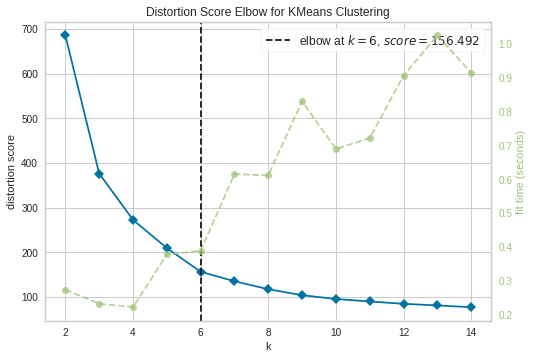

In [400]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(pcadt)
visualizer.poof()

In [401]:
kme = KMeans(n_clusters=3).fit(pcadt)
kme.labels_

array([2, 1, 1, ..., 2, 2, 2], dtype=int32)

In [402]:
y_km = km.fit_predict(pcadt)

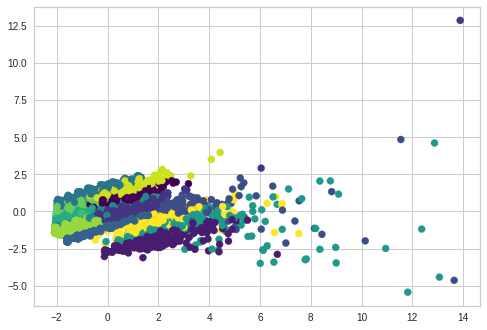

In [403]:
plt.scatter(data_embeddings_pca[:, 0], data_embeddings_pca[:, 1], c=y_km, s=50, cmap='viridis')

In [404]:
data['area'] = data['area'].astype(float, errors = 'raise')

Fractal Clustering

In [405]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

In [406]:
# Function to generate silhoutte score and SSE aas a metric to determine ideal number of cluster 
def plot_cluster(data, max_loop= 20):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = data.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X) #apply k-means
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    # Generating the images 
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [407]:
# we will use the robust method to scale the data and thereafter, we will apply kmeans clustering 
def apply_cluster(data, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = data.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    data['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    # calculating the silhoutte score and sse values 
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score,2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))
    
    return data

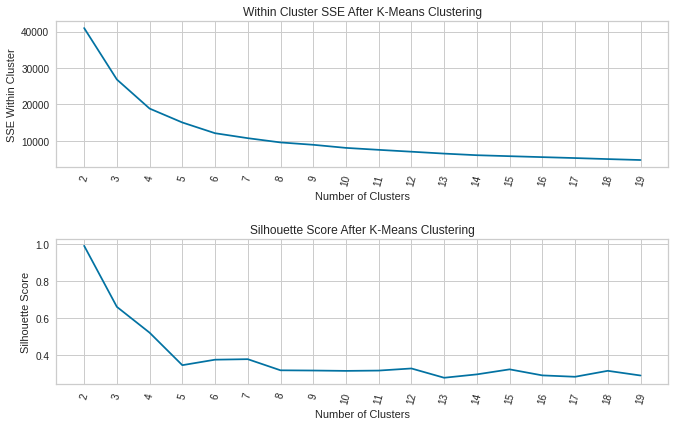

In [408]:
plot_cluster(data)

In [409]:
firsttrail = apply_cluster(data, clusters = 5)
firsttrail

clustering performance
-----------------------------------
silhouette score: 0.35
sse withing cluster: 15057


,index,price,bathrooms,bedrooms,area,Price Type,cluster
0,1226,78000.0,1.0,2.0,980.0,1,2
1,3638,1875000.0,2.0,4.0,1742.0,2,4
2,5546,1599000.0,3.0,3.0,2310.0,2,4
3,1555,385000.0,1.0,2.0,760.0,0,2
4,1698,614000.0,4.0,4.0,2726.0,0,0
...,...,...,...,...,...,...,...
5723,741,829000.0,2.0,2.0,1080.0,0,2
5724,744,999000.0,2.0,3.0,1256.0,0,2
5725,745,649000.0,1.0,1.0,657.0,0,2
5726,746,899000.0,2.0,3.0,1223.0,0,2


In [410]:
cluster_ind = (firsttrail.groupby('cluster').agg({"price" :"mean","bathrooms" :"mean","bedrooms" :"mean","area" :"mean"}).reset_index())
count = np.bincount(firsttrail.cluster)

cluster_ind['ClusterCount'] = count
cluster_ind

,cluster,price,bathrooms,bedrooms,area,ClusterCount
0,0,5.956139e+05,3.177461,3.758007,2368.508304,1686
1,1,3.990000e+05,3.000000,3.000000,352836.000000,1
2,2,4.370392e+05,1.664601,2.488169,1279.985990,3212
3,3,1.203966e+07,5.939394,4.757576,5181.000000,33
4,4,2.164683e+06,3.648241,4.163317,3040.896985,796


In [411]:
#According to business objective, we will select cluster 3 for the price overlapping between the 
df2_sub = data.query("cluster == 2").reset_index(drop = True)
df2_sub

,index,price,bathrooms,bedrooms,area,Price Type,cluster
0,1226,78000.0,1.0,2.0,980.0,1,2
1,1555,385000.0,1.0,2.0,760.0,0,2
2,1913,185000.0,2.0,3.0,1491.0,0,2
3,4066,78000.0,1.0,3.0,2214.0,1,2
4,1124,1288000.0,2.0,3.0,1283.0,2,2
...,...,...,...,...,...,...,...
3207,741,829000.0,2.0,2.0,1080.0,0,2
3208,744,999000.0,2.0,3.0,1256.0,0,2
3209,745,649000.0,1.0,1.0,657.0,0,2
3210,746,899000.0,2.0,3.0,1223.0,0,2


1st Internal Cluster

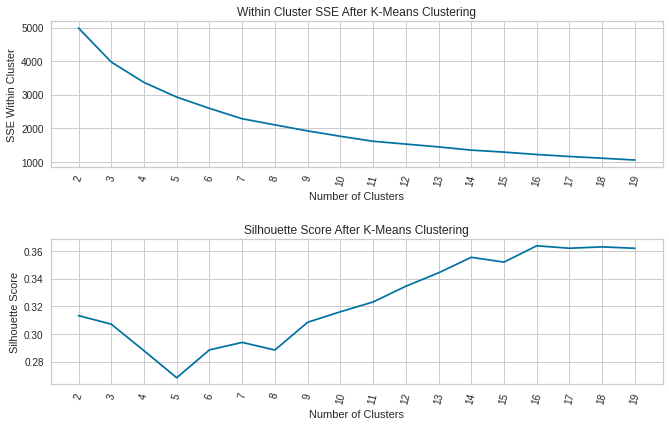

In [412]:
plot_cluster(df2_sub, max_loop=20)

In [413]:
secondtrial = apply_cluster(df2_sub, clusters=4)
secondtrial

clustering performance
-----------------------------------
silhouette score: 0.29
sse withing cluster: 3367


,index,price,bathrooms,bedrooms,area,Price Type,cluster
0,1226,78000.0,1.0,2.0,980.0,1,1
1,1555,385000.0,1.0,2.0,760.0,0,1
2,1913,185000.0,2.0,3.0,1491.0,0,0
3,4066,78000.0,1.0,3.0,2214.0,1,0
4,1124,1288000.0,2.0,3.0,1283.0,2,2
...,...,...,...,...,...,...,...
3207,741,829000.0,2.0,2.0,1080.0,0,3
3208,744,999000.0,2.0,3.0,1256.0,0,3
3209,745,649000.0,1.0,1.0,657.0,0,1
3210,746,899000.0,2.0,3.0,1223.0,0,3


In [414]:
cluster_ind1 = (secondtrial.groupby('cluster').agg({"price" :"mean","bathrooms" :"mean","bedrooms" :"mean","area" :"mean"}).reset_index())
count = np.bincount(secondtrial.cluster)

cluster_ind1['ClusterCount'] = count
cluster_ind1

,cluster,price,bathrooms,bedrooms,area,ClusterCount
0,0,3.435323e+05,1.826049,3.237337,1569.738061,1382
1,1,2.323486e+05,1.132254,1.523981,855.497602,834
2,2,1.369981e+06,1.735537,2.661157,1365.000000,121
3,3,6.508134e+05,1.907200,2.200000,1215.185143,875


In [415]:
#Here will take cluster 1 as it has 5 beds and 6 baths which will fall in the overlapping zone
df2_sub2 = df2_sub.query("cluster == 1").reset_index(drop = True)
df2_sub2

,index,price,bathrooms,bedrooms,area,Price Type,cluster
0,1226,78000.0,1.0,2.0,980.0,1,1
1,1555,385000.0,1.0,2.0,760.0,0,1
2,1184,16600.0,1.0,2.0,1088.0,1,1
3,2296,379900.0,1.0,2.0,820.0,0,1
4,3909,300000.0,1.0,1.0,464.0,0,1
...,...,...,...,...,...,...,...
829,713,5000.0,2.0,2.0,1400.0,1,1
830,716,899000.0,1.0,1.0,835.0,0,1
831,723,2695.0,1.0,1.0,500.0,1,1
832,736,890000.0,1.0,1.0,674.0,0,1


2nd Internal Cluster

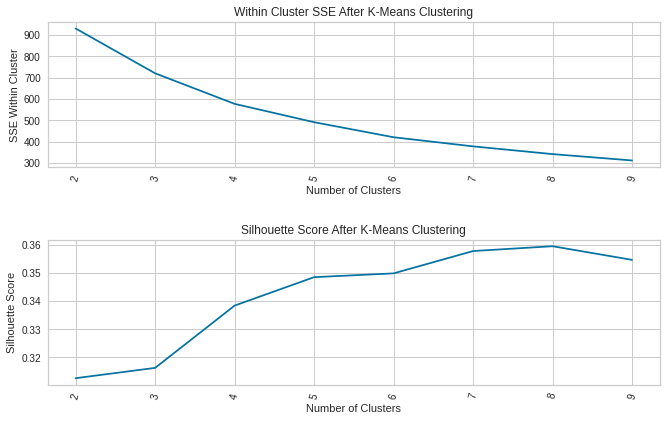

In [416]:
plot_cluster(df2_sub2, max_loop=10)

In [417]:
thirdtrial= apply_cluster(df2_sub2, clusters=3)
thirdtrial

clustering performance
-----------------------------------
silhouette score: 0.32
sse withing cluster: 720


,index,price,bathrooms,bedrooms,area,Price Type,cluster
0,1226,78000.0,1.0,2.0,980.0,1,0
1,1555,385000.0,1.0,2.0,760.0,0,1
2,1184,16600.0,1.0,2.0,1088.0,1,0
3,2296,379900.0,1.0,2.0,820.0,0,1
4,3909,300000.0,1.0,1.0,464.0,0,1
...,...,...,...,...,...,...,...
829,713,5000.0,2.0,2.0,1400.0,1,0
830,716,899000.0,1.0,1.0,835.0,0,1
831,723,2695.0,1.0,1.0,500.0,1,2
832,736,890000.0,1.0,1.0,674.0,0,1


In [418]:
cluster_ind2 = (thirdtrial.groupby('cluster').agg({"price" :"mean","bathrooms" :"mean","bedrooms" :"mean","area" :"mean"}).reset_index())
count = np.bincount(thirdtrial.cluster)

cluster_ind2['ClusterCount'] = count
cluster_ind2

,cluster,price,bathrooms,bedrooms,area,ClusterCount
0,0,94198.464602,1.331858,1.946903,1123.331858,226
1,1,384824.469248,1.069476,1.343964,764.038724,439
2,2,21017.556213,1.028402,1.426036,734.905325,169


In [419]:
df2_sub3 = df2_sub2.query("cluster == 1").reset_index(drop = True)
df2_sub3

,index,price,bathrooms,bedrooms,area,Price Type,cluster
0,1555,385000.0,1.0,2.0,760.0,0,1
1,2296,379900.0,1.0,2.0,820.0,0,1
2,3909,300000.0,1.0,1.0,464.0,0,1
3,2796,299000.0,1.0,2.0,504.0,0,1
4,4840,359900.0,1.0,2.0,608.0,0,1
...,...,...,...,...,...,...,...
434,667,899000.0,1.0,1.0,773.0,0,1
435,681,737000.0,1.0,1.0,524.0,0,1
436,716,899000.0,1.0,1.0,835.0,0,1
437,736,890000.0,1.0,1.0,674.0,0,1


The above cluster we achieved is our golden cluster which falls in the overlapping range of expensive and affordable.

Muller Loop

Classication

In [420]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

classifiers = [
    MLPClassifier(random_state=1, max_iter=150),
    RandomForestClassifier(max_depth=3, random_state=1, n_estimators=10),
    KNeighborsClassifier(n_neighbors=3),
    XGBClassifier()
]

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [421]:
classifiers = [
    MLPClassifier(random_state=1, max_iter=150),
    RandomForestClassifier(max_depth=3, random_state=1, n_estimators=10),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=1),
    XGBClassifier()
]

In [422]:
X = data.drop(['Price Type'], axis=1)
y = data['Price Type']

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

In [427]:
import time
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('/content/drive/MyDrive/Team Dragonites/Midterm Dataset/Vishnu/Pickle files/'+name+'.pkl', 'wb'))
    if name == 'Decision Tree': 
      Classifier = clf
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = 74.19, Training time = 1.64 seconds
Classifier = Linear SVM, Score (test, accuracy) = 98.72, Training time = 0.13 seconds
Classifier = RBF SVM, Score (test, accuracy) = 99.77, Training time = 0.11 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 100.00, Training time = 0.04 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.80 seconds


In [428]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = Gaussian Process, Score (test, accuracy) = 100.00


Regression

In [429]:
regressors = [
    MLPRegressor(random_state=1, max_iter=150),
    RandomForestRegressor(max_depth=3, random_state=1, n_estimators=10),
    KNeighborsRegressor(n_neighbors=3),
    GradientBoostingRegressor(random_state=1),
    XGBRegressor()
]

In [431]:
import time
max_score = 0.0
max_class = ''
# iterate over regressors
for name, clf in zip(names, regressors):
    start_time = time.time()
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('/content/drive/MyDrive/Team Dragonites/Midterm Dataset/Vishnu/Pickle files/'+name+'.pkl', 'wb'))
    if name == 'Decision Tree': 
      Classifier = clf
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = -1450017.80, Training time = 1.81 seconds
Classifier = Linear SVM, Score (test, accuracy) = 99.99, Training time = 0.10 seconds
Classifier = RBF SVM, Score (test, accuracy) = 98.92, Training time = 0.03 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 100.00, Training time = 0.53 seconds
[05:18:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.30 seconds


In [432]:
print('Best --> Regressor = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Regressor = Gaussian Process, Score (test, accuracy) = 100.00


Latent Variables - 1)Will categorise houses based on area whether it is a bungalow/villa, appartment or condos.

In [433]:
data.drop('cluster',axis=1,inplace=True)

In [434]:
data.shape

(5728, 6)

In [435]:
e = data['area'].tolist()
f = [0] * len(e)
for i in range(0,5728):
  if e[i]<1200.0:
    f[i]= "Condos" 
  elif e[i]>=1200.0 and e[i]<3200.0 :
    f[i] = "Appartment" 
  else:
    f[i]= "Villa"

data.head()

,index,price,bathrooms,bedrooms,area,Price Type
0,1226,78000.0,1.0,2.0,980.0,1
1,3638,1875000.0,2.0,4.0,1742.0,2
2,5546,1599000.0,3.0,3.0,2310.0,2
3,1555,385000.0,1.0,2.0,760.0,0
4,1698,614000.0,4.0,4.0,2726.0,0


In [436]:
g = pd.DataFrame(f)
g

,0
0,Condos
1,Appartment
2,Appartment
3,Condos
4,Appartment
...,...
5723,Condos
5724,Appartment
5725,Condos
5726,Appartment


In [437]:
data = pd.concat([data, g], axis=1, join='inner')
data.set_axis([*data.columns[:-1], 'House Type'], axis=1, inplace=True)

In [438]:
data.head()

,index,price,bathrooms,bedrooms,area,Price Type,House Type
0,1226,78000.0,1.0,2.0,980.0,1,Condos
1,3638,1875000.0,2.0,4.0,1742.0,2,Appartment
2,5546,1599000.0,3.0,3.0,2310.0,2,Appartment
3,1555,385000.0,1.0,2.0,760.0,0,Condos
4,1698,614000.0,4.0,4.0,2726.0,0,Appartment


In [439]:
y = data['House Type']
c = Counter(y)
c

Counter({'Appartment': 3692, 'Condos': 1512, 'Villa': 524})

In [440]:
le = preprocessing.LabelEncoder()
le.fit(data['House Type'])
data['House Type'] = le.transform(data['House Type'])
data

,index,price,bathrooms,bedrooms,area,Price Type,House Type
0,1226,78000.0,1.0,2.0,980.0,1,1
1,3638,1875000.0,2.0,4.0,1742.0,2,0
2,5546,1599000.0,3.0,3.0,2310.0,2,0
3,1555,385000.0,1.0,2.0,760.0,0,1
4,1698,614000.0,4.0,4.0,2726.0,0,0
...,...,...,...,...,...,...,...
5723,741,829000.0,2.0,2.0,1080.0,0,1
5724,744,999000.0,2.0,3.0,1256.0,0,0
5725,745,649000.0,1.0,1.0,657.0,0,1
5726,746,899000.0,2.0,3.0,1223.0,0,0


In [441]:
y = data['House Type']
c = Counter(y)
c

Counter({0: 3692, 1: 1512, 2: 524})

In [442]:
X1 = data.drop(['House Type'], axis=1)
y1 = data['House Type']

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=17)

In [445]:
import time
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('/content/drive/MyDrive/Team Dragonites/Midterm Dataset/Vishnu/Pickle files/'+name+'.pkl', 'wb'))
    if name == 'Decision Tree': 
      Classifier = clf
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = 20.70, Training time = 2.83 seconds
Classifier = Linear SVM, Score (test, accuracy) = 98.14, Training time = 0.07 seconds
Classifier = RBF SVM, Score (test, accuracy) = 75.70, Training time = 0.09 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 100.00, Training time = 0.02 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.58 seconds


In [446]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = Gaussian Process, Score (test, accuracy) = 100.00


In [448]:
import time
max_score = 0.0
max_class = ''
# iterate over regressors
for name, clf in zip(names, regressors):
    start_time = time.time()
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('/content/drive/MyDrive/Team Dragonites/Midterm Dataset/Vishnu/Pickle files/'+name+'.pkl', 'wb'))
    if name == 'Decision Tree': 
      Classifier = clf
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = -2005608.03, Training time = 1.57 seconds
Classifier = Linear SVM, Score (test, accuracy) = 100.00, Training time = 0.06 seconds
Classifier = RBF SVM, Score (test, accuracy) = 15.80, Training time = 0.02 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 100.00, Training time = 0.37 seconds
[05:19:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.18 seconds


In [449]:
print('Best --> Regressor = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Regressor = Linear SVM, Score (test, accuracy) = 100.00


Confusion Matrix for classifiers

Decision Tree

In [466]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [467]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[3327    0    0]
 [   5 1363    0]
 [   8    0  453]]
0.9963450292397661
1.0


In [468]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.997478665632273


In [469]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3327
           1       1.00      1.00      1.00      1368
           2       1.00      0.98      0.99       461

    accuracy                           1.00      5156
   macro avg       1.00      0.99      1.00      5156
weighted avg       1.00      1.00      1.00      5156



XGBClassifier

In [470]:
# Create Decision Tree classifer object
clf = XGBClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [471]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[3327    0    0]
 [   5 1363    0]
 [   8    0  453]]
0.9963450292397661
1.0


In [472]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.997478665632273


In [473]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3327
           1       1.00      1.00      1.00      1368
           2       1.00      0.98      0.99       461

    accuracy                           1.00      5156
   macro avg       1.00      0.99      1.00      5156
weighted avg       1.00      1.00      1.00      5156



Random Forest

In [474]:
# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [475]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[3327    0    0]
 [   5 1363    0]
 [   5    0  456]]
0.9963450292397661
1.0


In [476]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9980605120248255


In [477]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3327
           1       1.00      1.00      1.00      1368
           2       1.00      0.99      0.99       461

    accuracy                           1.00      5156
   macro avg       1.00      1.00      1.00      5156
weighted avg       1.00      1.00      1.00      5156



KNN

In [478]:
# Create Decision Tree classifer object
clf = KNeighborsClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [479]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[2786  430  111]
 [ 973  390    5]
 [ 331   19  111]]
0.28613352898019073
0.8662935323383084


In [480]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6375096974398758


In [481]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      3327
           1       0.46      0.29      0.35      1368
           2       0.49      0.24      0.32       461

    accuracy                           0.64      5156
   macro avg       0.54      0.45      0.48      5156
weighted avg       0.61      0.64      0.61      5156



MLP

In [482]:
# Create Decision Tree classifer object
clf = MLPClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [483]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)
sensitive = conf[0,0]/(conf[0,0]+conf[0,1])
specificity = conf[1,1]/(conf[1,0]+conf[1,1])
print(specificity)
print(sensitive)

[[ 944   23 2360]
 [ 576   53  739]
 [  35    0  426]]
0.08426073131955485
0.9762150982419855


In [484]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.275989138867339


In [485]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.28      0.39      3327
           1       0.70      0.04      0.07      1368
           2       0.12      0.92      0.21       461

    accuracy                           0.28      5156
   macro avg       0.48      0.42      0.22      5156
weighted avg       0.59      0.28      0.29      5156



on a whole for reference
0 => Affordable
1 => Cheap
2 => Expensive

##**INSIGHTS**

Business Case & Value: Trying to solve a classificatin problem of dividing house categories in affordable, cheap or expensive by keeping in mind the percentage of people that falls under category of rich, medium class or below poverty line.

Algorithms | Performance Score | Performance Measure Metric
--- | --- | ---
1. PCA |3 Principal Components can contain almost 60% of the information
2. K-means | 0.35 | Silhouette score 
3. Random Forest       | .99 | Accuracy
                       |1.00 | Precision [0/1]
                       |0.98/1.00    | Recall [0/1]
                       |0.99/1.00 | F1-score [0/1]
                       |461/3327    | Support [0/1]
4. Decision Tree       | 1.0 | Accuracy
                       |1.00 | Precision [0/1]
                       |0.99/1.00   | Recall [0/1]
                       |1.00 | F1-score [0/1]
                       |5156    | Support [0/1]
5. MLP                 | .27 | Accuracy
                       |.12/.61 | Precision [0/1]
                       |.04/.92  | Recall [0/1]
                       |0.07/0.39 | F1-score [0/1]
                       |461/3327    | Support [0/1]
9. KNN                 | .63 | Accuracy
                       |.46/.68 | Precision [0/1]
                       |.24/.84 | Recall [0/1]
                       |.32/.75 | F1-score [0/1]
                       |461/3327    | Support [0/1] 
11. XGBoost            | 1.0 | Accuracy
                       |1.00 | Precision [0/1]
                       |.98/1.00 | Recall [0/1]
                       |0.99/1.00 | F1-score [0/1]
                       |461/3327    | Support [0/1] 

-----------------------------------------------------------------------

=> I have preprocessed our data with utmost care to get the maximum details we wanted

=> I then classified into sets to achieve appropriate results

=> Had used different algoriths to produce discrete sets with highest F1 Score

##**Conclusion**
I have grown on how we think while making this. I started of after a strong and solid technology stack and a proper idea by knowing what to achieve from this architecture, but later being faced with many challenges our approach towards the solution had changed then we researched on the algorithms that on what is needed for features and how the algorithm affects our program on showing the results, so what changes should be made to achieve the results.

As per our business case we have predicted the prices of house into 3 discrete sets with calssification and regression. Some gave a very good score of 100% making the result as successfull as we want.